# <font color=red>*Customer Churn Analysis*</font>

Customer Retention is most important for the compoany to increses it profit compared to getting new customer which 2 times more expensive<br>
It is important for the companies  to know what leads a client towards the decision to leave the company

## Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

##  Loading the Data

In [3]:
df = pd.read_csv("Bank_churn.csv")


In [4]:
df.head(5)  # top 5 records

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.tail(5) #bottom 5 records

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Understanding the Data

In [6]:
df.shape


(10000, 14)

<div class="alert alert-info">The dataset contains 10000 rows and 14 features</div>

In [7]:
df.info()  # Now let's see the data types of all 14 columns and non-null values present in each

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB



RowNumber: corresponds to the record (row) number and has no effect on the output.<br>
CustomerId: contains random values and has no effect on customer leaving the bank.<br>
Surname: the surname of a customer has no impact on their decision to leave the bank.<br>
CreditScore: can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.<br>
Geography: a customer’s location can affect their decision to leave the bank.<br>
Gender: it’s interesting to explore whether gender plays a role in a customer leaving the bank.<br>
Age: this is certainly relevant, since older customers are less likely to leave their bank than younger ones.<br>
Tenure: refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.<br>
Balance: also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.<br>
NumOfProducts: refers to the number of products that a customer has purchased through the bank.<br>
HasCrCard: denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.<br>
IsActiveMember: active customers are less likely to leave the bank.<br>
EstimatedSalary: as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.<br>
Exited: whether or not the customer left the bank. (0=No,1=Yes)<br>

<div class="alert alert-info">There are many useless features relavent to the usecase moving forward lets drop that features</div>

<Axes: >

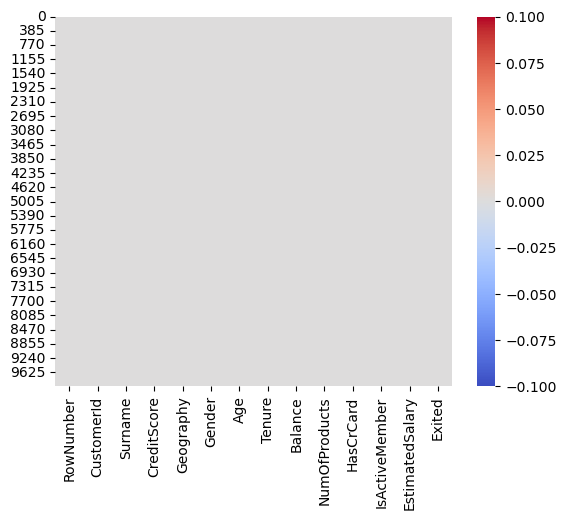

In [8]:
# lets check the null values
sns.heatmap(df.isnull(),cmap='coolwarm')

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<div class="alert alert-info">Luckly we don't have any null values in the dataset so lets move furthur ❤️</div>

In [10]:
#lets check for duplicates

df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


<div class="alert alert-info">No duplicate values also present in the data</div>

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


<div class="alert alert-info">From the description we can see tha average age of the bank Customers<br> Average balance <br>and information about their credit scoure</div>

In [12]:
df.describe(include='object').T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


## Pre-Processing of Data

In [13]:
#### Dropping insignificant columns
df.drop(columns= ['RowNumber','CustomerId','Surname'],inplace=True)

In [14]:
df.shape

(10000, 11)

<Axes: >

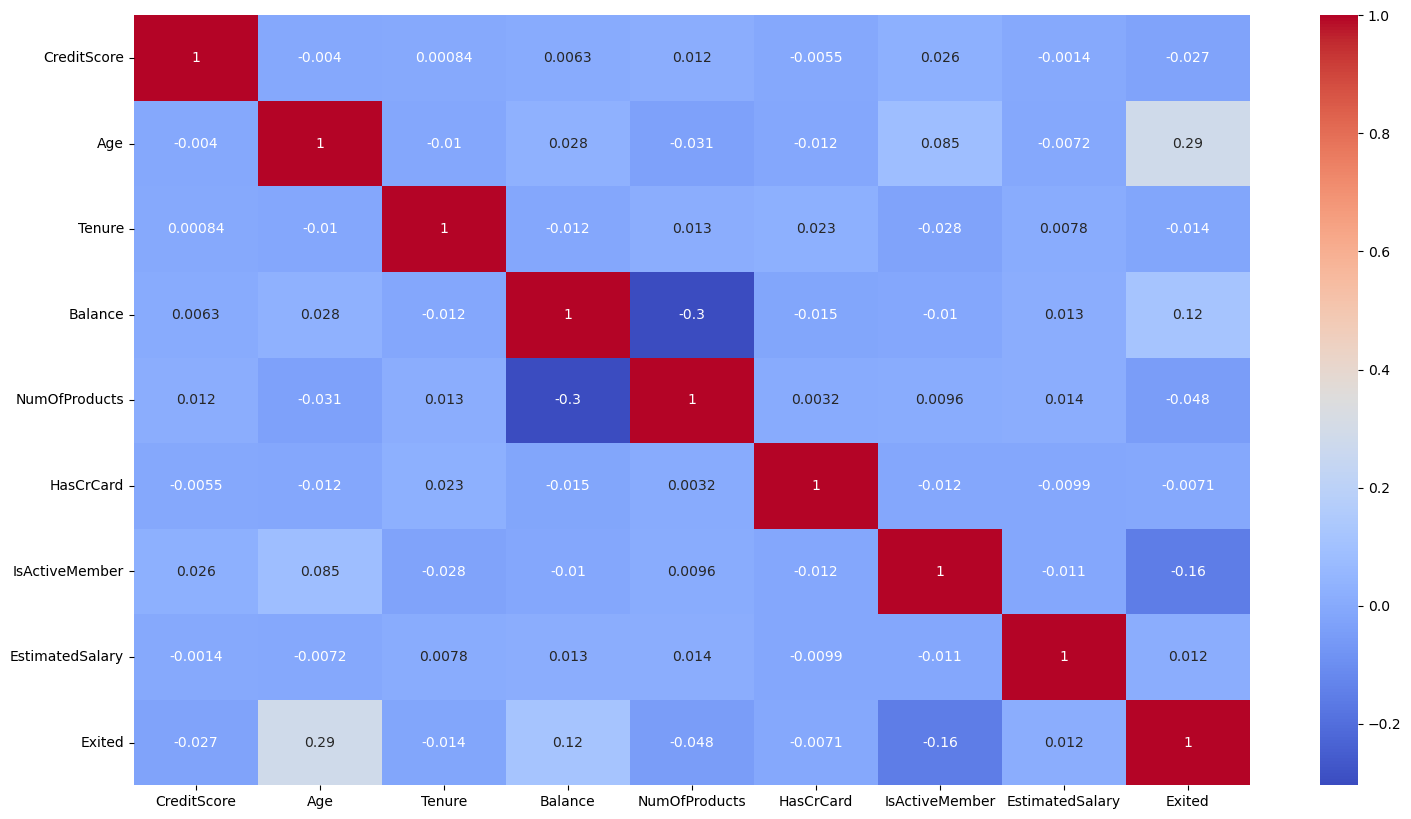

In [15]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),yticklabels=True,cbar=True,cmap='coolwarm',annot=True)

<div class="alert alert-info">
No two columns show a correlation greater than 0.75. So as theoretically suggested, we are good to go here.
</div>

In [16]:
#Lets Tranforme the data to get some information from the it

conditions = [
    (df['EstimatedSalary'] <= 25000),
    (df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
    (df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
    (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
    (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
    (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
    (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
    (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]

values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000','1,00,000-1,25,000','1,25,000-1,50,000',
          '1,50,000-1,75,000','1,75,000-2,00,000'  ]

df['SalaryRange'] = np.select(conditions, values)


In [17]:
df['SalaryRange'].value_counts()

1,50,000-1,75,000    2455
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

<div class="alert alert-info">More people get the salary range around 150000 to 175000</div>

In [18]:
df['Exited'].value_counts()   #the dataset is class imbalance 

0    7963
1    2037
Name: Exited, dtype: int64

In [19]:
#Transforming age column
conditions = [
    (df['Age'] >= 0) & (df['Age'] <= 18),
    (df['Age'] >= 18) & (df['Age'] < 30),
    (df['Age'] >= 30) & (df['Age'] < 40),
    (df['Age'] >= 40) & (df['Age'] < 50),
    (df['Age'] >= 50) & (df['Age'] < 60),
    (df['Age'] >= 60)
]

values = ['Minors', '18-30', '30-40','40-50','50-60','>60']

df['AgeGroup'] = np.select(conditions, values)

In [20]:
df['AgeGroup'].value_counts()

30-40     4346
40-50     2618
18-30     1619
50-60      869
>60        526
Minors      22
Name: AgeGroup, dtype: int64

<div class="alert alert-info">The most common age group is around 30 to 40</div>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
 11  SalaryRange      10000 non-null  object 
 12  AgeGroup         10000 non-null  object 
dtypes: float64(2), int64(7), object(4)
memory usage: 1015.8+ KB


## Univariate Analysis

<Figure size 6000x10000 with 0 Axes>

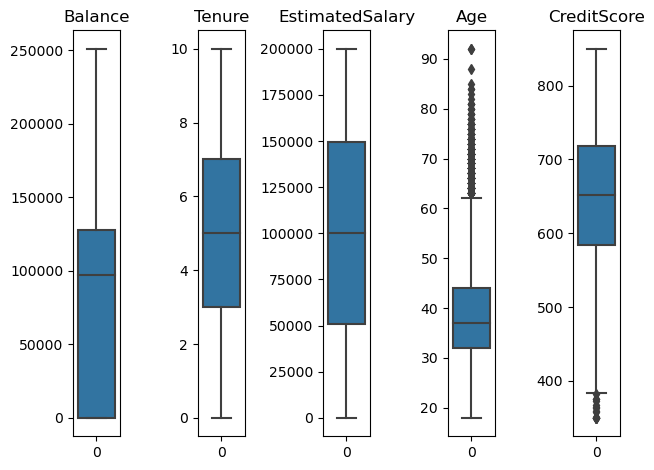

In [22]:

plt.figure(figsize=(60, 100))
# Store the list of columns
columns_to_plot = ['Balance','Tenure','EstimatedSalary', 'Age', 'CreditScore']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis) 
        axis.set_title(column)

# Show the plot
plt.tight_layout()
plt.show()


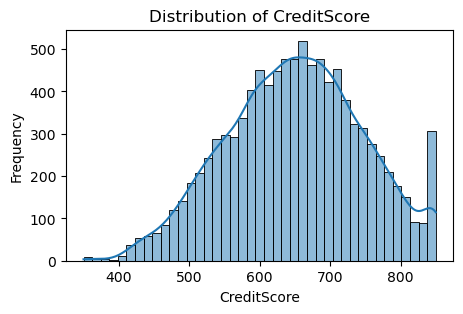

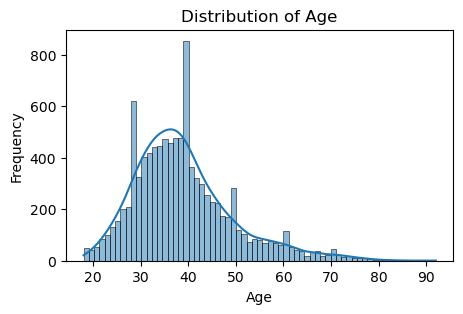

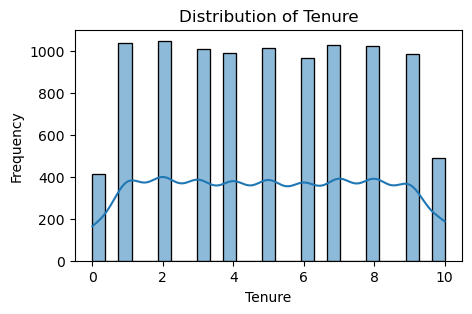

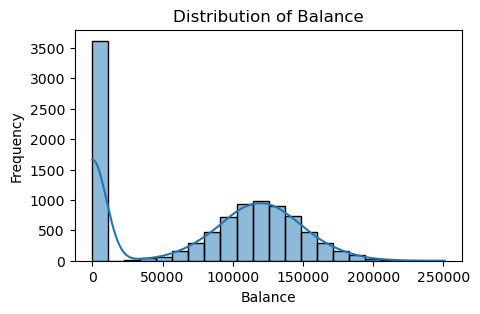

In [23]:
# Plot histograms for all numerical columns
numerical_columns = ['CreditScore','Age','Tenure','Balance']
for column in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
   


<div class="alert alert-info">The Age column is skewed</div>

In [24]:
df['Age'].skew()  

1.0113202630234552

In [25]:
df['Balance'].skew()  

-0.14110871094154384

In [26]:
df['CreditScore'].skew()  

-0.07160660820092675

In [27]:
df['Age1'] = np.log(df['Age']) #log normal tranformation

In [28]:
df['Age1'].skew()

0.182020112559587

## Bivariate Analysis

<Axes: xlabel='Balance', ylabel='Estimated Salary'>

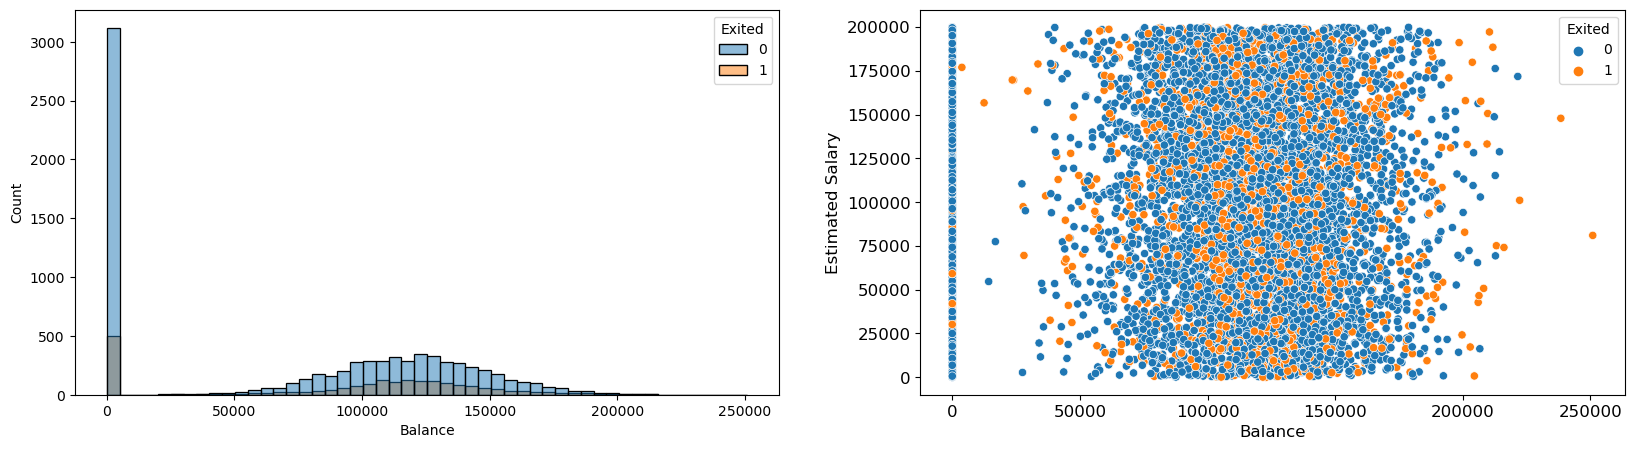

In [29]:

fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Balance',hue='Exited',bins=50,ax = axarr[0])

plt.xticks(size=12)
plt.xlabel('Balance',size=12)
plt.yticks(size=12)
plt.ylabel('Estimated Salary',size=12)
sns.scatterplot(data=df,x='Balance',y='EstimatedSalary',hue='Exited',ax=axarr[1])



<div class="alert alert-info"> The  customers having zero balance churning out is maximum. People keep 0 balance no matter how high or low their estimated salary is.</div>

<Axes: xlabel='Gender', ylabel='count'>

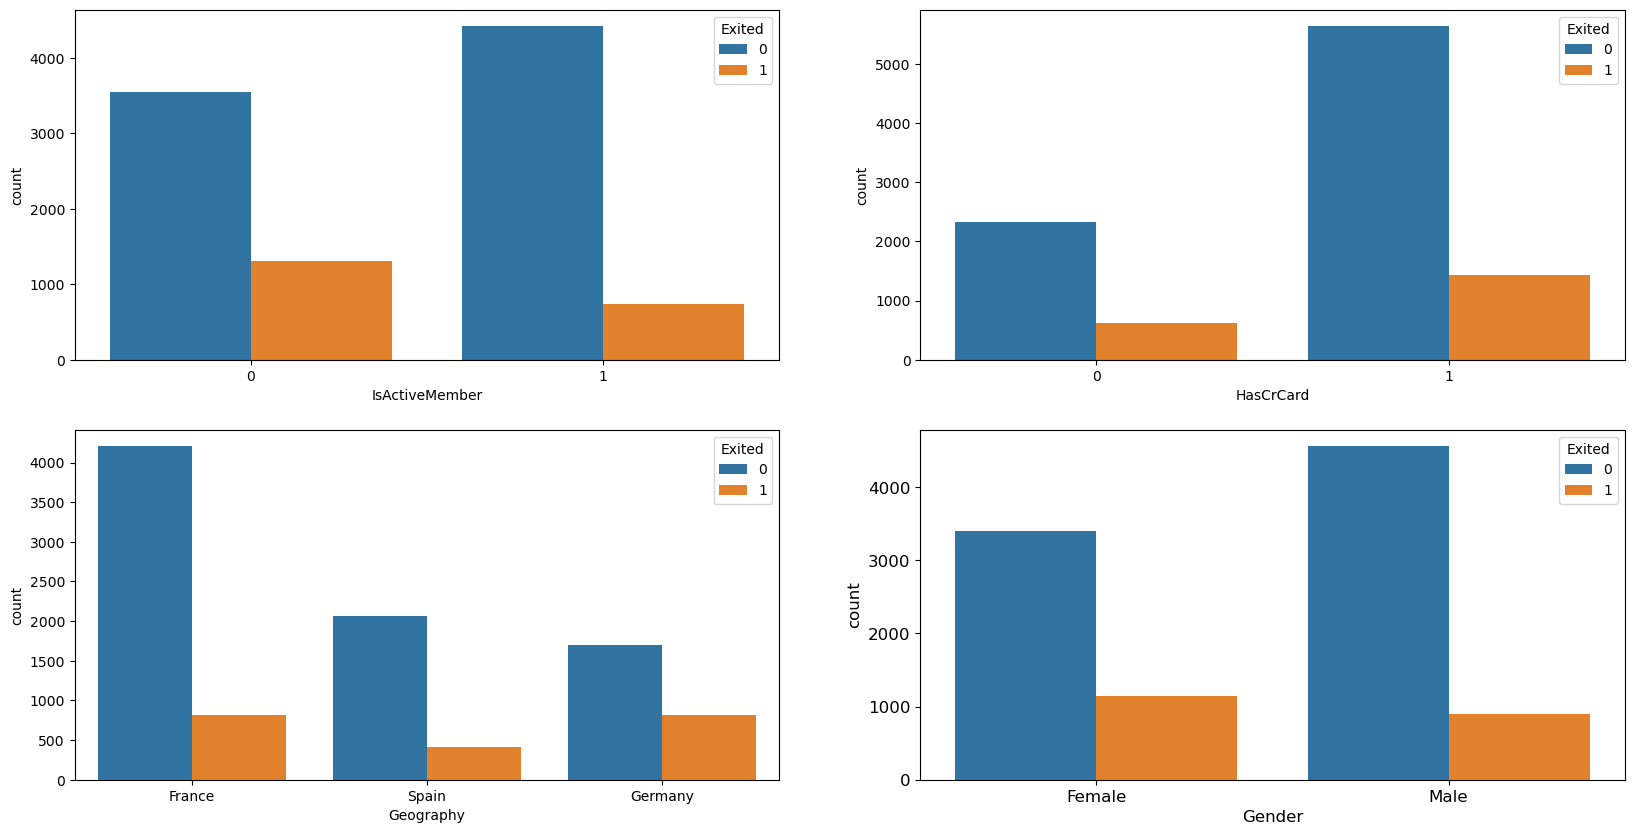

In [30]:

fig, axarr = plt.subplots(2,2, figsize=(20, 10))

plt.xticks(size=12)
plt.xlabel('Is Active Member (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='IsActiveMember',hue='Exited',ax=axarr[0][0])
total = len(df['IsActiveMember'])

plt.xticks(size=12)
plt.xlabel('Has Credit Card (Yes/No)',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)    
ax = sns.countplot(data=df,x='HasCrCard',hue='Exited',ax=axarr[0][1])    
total = len(df['HasCrCard'])

plt.xticks(size=12)
plt.xlabel('Geography',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
ax = sns.countplot(data=df,x='Geography',hue='Exited',ax=axarr[1][0])
total = len(df['Geography'])

    
plt.xticks(size=12)
plt.xlabel('Gender',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)  
sns.countplot(data=df,x='Gender',hue='Exited',ax=axarr[1][1])





<div class="alert alert-info">Chances of a non-active member churning out is double the chances of an active member churning out. Bank needs to  check with the customers for being inactive , give them some offers plan.<br>
Majority of the customers that churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.<br>
Male to female ratio of customers is 5:4.Clearly as observed churn probability is more for a female customer.</div>

<Axes: xlabel='AgeGroup', ylabel='count'>

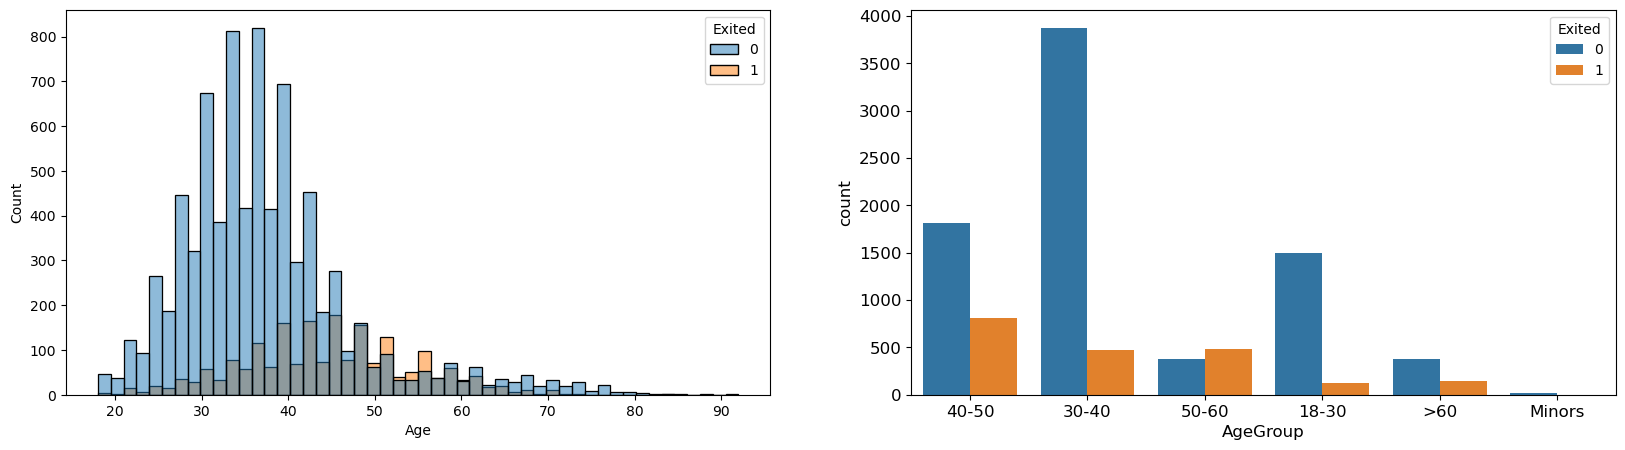

In [31]:

fig, axarr = plt.subplots(1,2, figsize=(20, 5))
plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.histplot(data=df,x='Age',hue='Exited',bins=50,ax=axarr[0])

plt.xticks(size=12)
plt.xlabel('Age Groups',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)
sns.countplot(data=df,x ='AgeGroup',hue='Exited',ax=axarr[1])



<div class="alert alert-info"> 40-50 is the age group where the churn rate is maximum <br> And also for age group 50-60 customers churned is more than customer retention.<br>The bank may need to review their target market or review the strategy for retention between the different age groups</div>

Text(0, 0.5, 'Count of Customers')

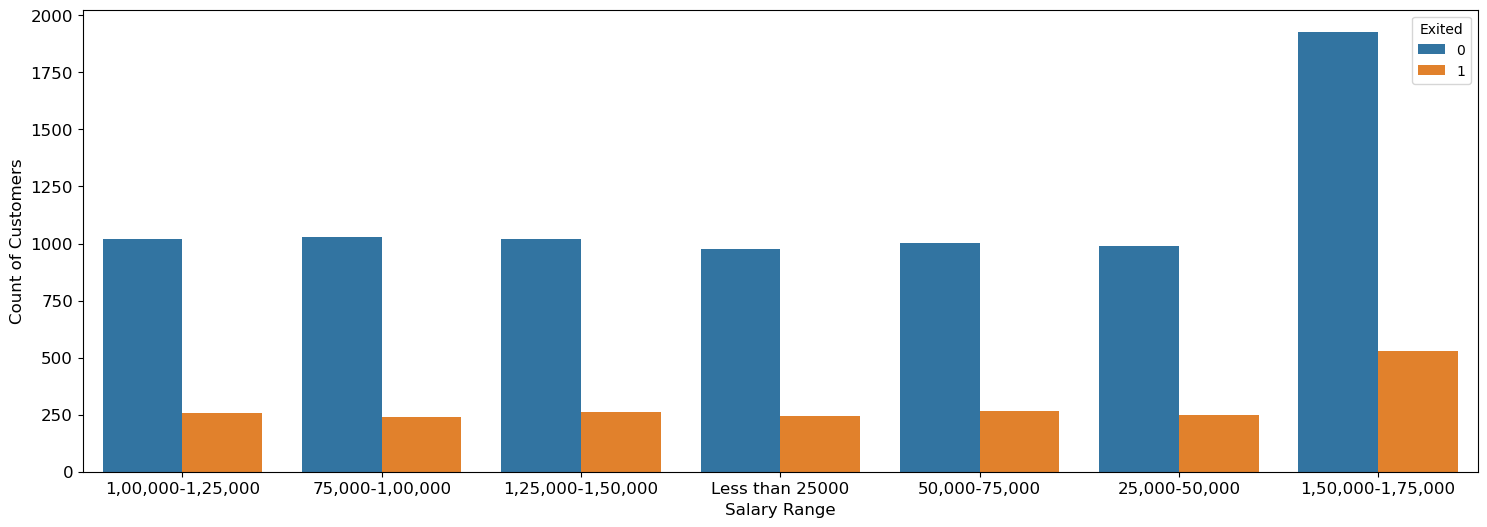

In [32]:
plt.figure(figsize=(18,6))
sns.countplot(data=df,x='SalaryRange',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Salary Range',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)

Text(0, 0.5, 'Count of Customers')

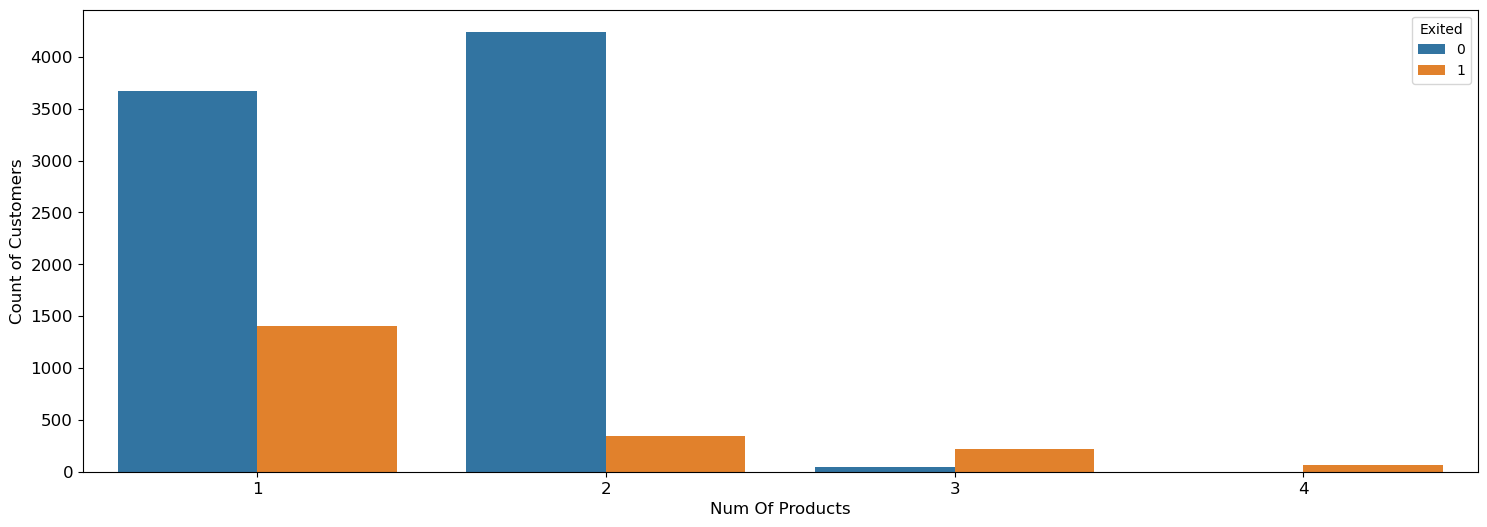

In [33]:
plt.figure(figsize=(18,6))
ax = sns.countplot(data=df,x='NumOfProducts',hue='Exited')
plt.xticks(size=12)
plt.xlabel('Num Of Products',size=12)
plt.yticks(size=12)
plt.ylabel('Count of Customers',size=12)

<div class="alert alert-info"> Maximum customers who churned out have used 1 product only (14% out of total 20%). Maybe bank needs to focus on convincing customers to use more of their services and products</div>

<Axes: xlabel='CreditScore', ylabel='Count'>

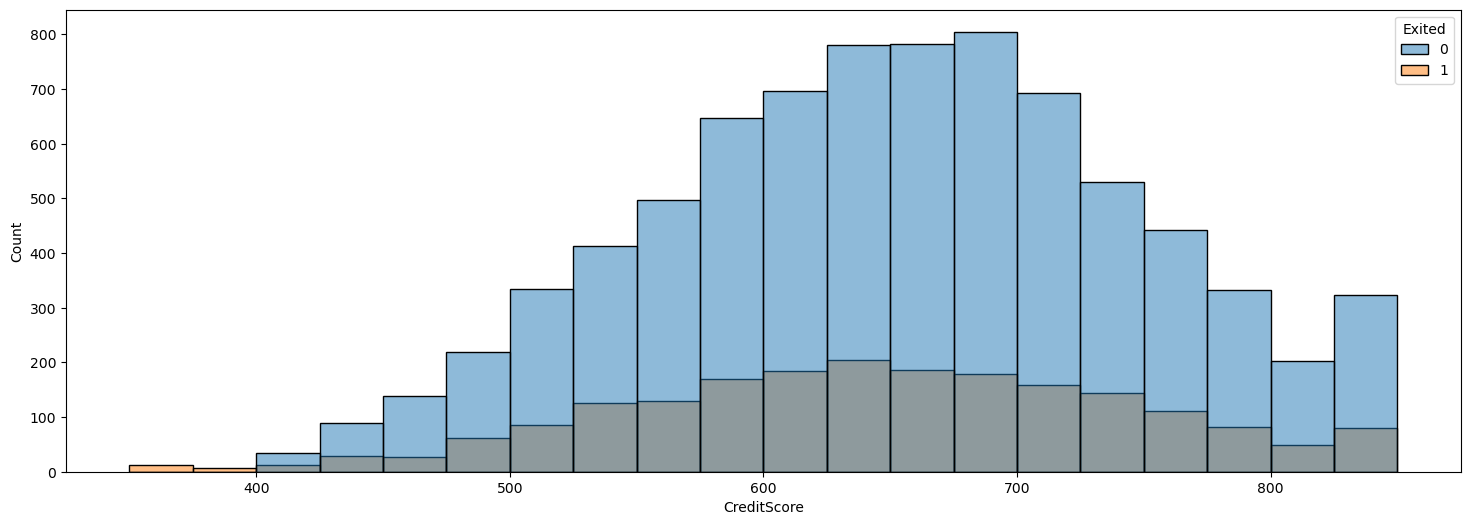

In [34]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')

<div class="alert alert-info">There is no effect on cerdit score and customer retention</div>

In [35]:
# Drop the columns formed for EDA as it's no longer needed. Also drop age and keep logarithmic values instead(age1)

df.drop(columns=['SalaryRange','AgeGroup','Age'],inplace=True)

## Lets deal with class imbalance

In [36]:
round(df['Exited'].value_counts()/len(df)*100,2)


0    79.63
1    20.37
Name: Exited, dtype: float64

<div class="alert alert-info">Lt's shows clear class imbalance in the dataset</div>

([<matplotlib.patches.Wedge at 0x1774fefc670>,
 [Text(-0.656864201043101, 0.8823431426537008, 'Exited'),
  Text(0.7165791284106554, -0.9625561556222191, 'Retained')],
 [Text(-0.35828956420532776, 0.4812780778111095, '20.4%'),
  Text(0.41800449157288233, -0.5614910907796278, '79.6%')])

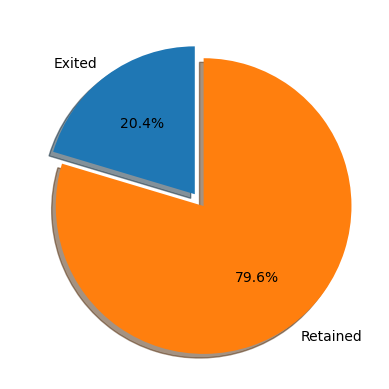

In [37]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

### <font color=Blue>*We can use  Synthetic Minority Over-sampling Technique(smote) to handle class imbalance*</font>

In [38]:
##importing libraries for models
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline


In [39]:
x = df.drop(columns=['Exited']) ## independent features
y  = df['Exited'] ## dependent features

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)  ## spliting the data
print("Shape of X_train:" ,x_train.shape)
print("Shape of X_test:" ,x_test.shape)

Shape of X_train: (8000, 10)
Shape of X_test: (2000, 10)


In [40]:
unique, count = np.unique(y_train ,return_counts= True)
target_valuecount= {k:v for (k,v) in zip (unique,count)}
target_valuecount


{0: 6384, 1: 1616}

In [41]:
unique, count = np.unique(y_test ,return_counts= True)
target_valuecounttest= {k:v for (k,v) in zip (unique,count)}
target_valuecounttest


{0: 1579, 1: 421}

In [42]:

categorical_cols = ['Gender','Geography']


numerical_cols = ['Age1',
                  'Balance',
                  'NumOfProducts',
                  'HasCrCard',
                  'IsActiveMember',
                  'CreditScore',
                  'Tenure',
                  'EstimatedSalary']

## Encoding and Scaling

In [43]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])


ColumnTransformer class from scikit-learn to apply different preprocessing techniques to different subsets of columns in a dataset

In [44]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=52)


In [45]:
#logistic regression model
logmodel=LogisticRegression()


In [46]:
## using pipeline to do the routine process in a correct flow
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('logmodel', logmodel)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('logmodel', LogisticRegression())])

In [47]:
unique, count = np.unique(y_train ,return_counts= True)
target_valuecount= {k:v for (k,v) in zip (unique,count)}
target_valuecount


{0: 6384, 1: 1616}

In [48]:
y_predicted = pipe.predict(x_test)  ## prediction

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))
print("Testing score: ",pipe.score(x_test, y_test))
print("MSE score: ",MSE(y_test,y_predicted))
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.713125
Testing score:  0.701
MSE score:  0.299
Accuracy: 0.70
Precision: 0.38
Recall: 0.67
F1-score: 0.49


In [50]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_predicted)


array([[1120,  459],
       [ 139,  282]], dtype=int64)

In [51]:
x_predicted = pipe.predict(x_train)  ## prediction
confusion_matrix(y_train,x_predicted)

array([[4549, 1835],
       [ 460, 1156]], dtype=int64)

In [52]:
col =['Training Score','Testing Score','MSE score','Accuracy','Precision','Recall','F1-Score']

model_log_report1 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Logistic Regression'])


In [53]:
model_log_report1

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.7,0.3,0.7,0.38,0.67,0.49


##  Hyper Parameter Tuning for Decision Tree Using GridSearch CV

In [54]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52) ## data spilting

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})  ##label encoding
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

def dtree_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality          
                   'max_features': ['auto', None], # features considered at splits
                   'max_depth': [5, 6, 8, 10,11],  # max nodes in each tree
                   'min_samples_leaf': [5,8, 10,12, 15], # samples required in each leaf
                   'min_samples_split': [5,10,15,20], # samples required to split node
                    } ]
    
    # decision tree model
    dtree_model=DecisionTreeClassifier()
    
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=nfolds)
    
    #fit model to data
    dtree_gscv.fit(X, y)
    
    return dtree_gscv.best_params_
## min_samples_split specifies the minimum number of samples required to split an internal node,
## while min_samples_leaf specifies the minimum number of samples required to be at a leaf node.

In [56]:
get_parameters = dtree_grid_search(x_train,y_train,10)
get_parameters

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': None,
 'min_samples_leaf': 12,
 'min_samples_split': 5}

In [57]:
## decision tree
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [58]:
decision_tree = DecisionTreeClassifier(random_state=52, max_depth=6, criterion = "entropy",
                                   max_features= None,
                                   min_samples_split=10,
                                   min_samples_leaf=12)


In [59]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('decision_tree', decision_tree)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('decision_tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                        min_samples_leaf=12,
                                        min_samples_split=10,
                                        random_state=52))])

In [60]:
y_predicted = pipe.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.78875
Testing score:  0.7885
MSE score:  0.2115
Accuracy: 0.79
Precision: 0.5
Recall: 0.76
F1-score: 0.60


In [62]:
from sklearn.metrics import confusion_matrix

y_predicted = pipe.predict(x_test)
confusion_matrix(y_test,y_predicted)


array([[1257,  322],
       [ 101,  320]], dtype=int64)

In [63]:
model_log_report2 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Decision Tree'])
model_log_report2

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Decision Tree,0.79,0.79,0.21,0.79,0.5,0.76,0.6


## Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

x_train['Gender'] = x_train['Gender'].replace({'Male':1,'Female':0})
x_train['Geography'] = x_train['Geography'].replace({'Germany':1,'France':0,'Spain':2})


In [66]:

def ran_for_grid_search(X,y,nfolds):
    
    #create a dictionary of all values we want to test
    param_grid = [ {'criterion': ['gini', 'entropy'], # measures split quality
                   'n_estimators': [30,50, 100, 200], # number trees to grow           
                   'max_depth': [6, 8, 10],  # max nodes in each tree
                   'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [5,8,10], # samples required to split node
                    } ]
    
    # random forest model
    rf_model=RandomForestClassifier()
    
    #use gridsearch to test all values
    rf_gscv = GridSearchCV(rf_model, param_grid, cv=nfolds)
    
    #fit model to data
    rf_gscv.fit(X, y)
    
    return rf_gscv.best_params_

In [67]:
best_par = ran_for_grid_search(x_train,y_train,10)

In [68]:
best_par

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 30}

In [69]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [70]:
random_forest = RandomForestClassifier(max_depth=10,
                                       n_estimators = 200, random_state=52,
                                       bootstrap=True,
                                       max_features=None,
                                       min_samples_split=5,
                                       min_samples_leaf=10,
                                       criterion='gini')


In [71]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('random_forest', random_forest)
                          ])

# Preprocessing of training data, fit model 
pipe.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Age1', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'CreditScore', 'Tenure',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Gender', 'Geography'])])),
                ('smote', SMOTE(random_state=52)),
                ('random_forest',
                 RandomForestClassifier(max_depth=10, max_features=None,
                                        min_samples_leaf=10,
                                        min_samples_split=5, n_estimators=200,
                                        random_state=52))])

In [72]:
y_predicted = pipe.predict(x_test)

In [73]:
from sklearn.metrics import mean_squared_error as MSE
print("Training score: ",pipe.score(x_train, y_train))

print("Testing score: ",pipe.score(x_test, y_test))

print("MSE score: ",MSE(y_test,y_predicted))

print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))


Training score:  0.864125
Testing score:  0.8275
MSE score:  0.1725
Accuracy: 0.83
Precision: 0.57
Recall: 0.72
F1-score: 0.64


In [74]:
from sklearn.metrics import confusion_matrix

y_predicted = pipe.predict(x_test)
confusion_matrix(y_test,y_predicted)

array([[1353,  226],
       [ 119,  302]], dtype=int64)

In [75]:
model_log_report3 = pd.DataFrame( 
                    {
                    'Training Score': [round(pipe.score(x_train, y_train),2)],
                    'Testing Score' : [round(pipe.score(x_test, y_test),2)], 
                    'MSE score': [round(MSE(y_test,y_predicted),2)],
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['Random Forest'])
model_log_report3

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Random Forest,0.86,0.83,0.17,0.83,0.57,0.72,0.64


## Comparing Models

In [76]:
col =['Training Score','Testing Score','Accuracy','Precision','Recall','F1-Score']
model_comp = pd.DataFrame(columns=col)
model_comp = pd.concat((model_log_report1,model_log_report2,model_log_report3))

In [77]:
model_comp

,Training Score,Testing Score,MSE score,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.71,0.70,0.30,0.70,0.38,0.67,0.49
Decision Tree,0.79,0.79,0.21,0.79,0.50,0.76,0.60
Random Forest,0.86,0.83,0.17,0.83,0.57,0.72,0.64


## <font color=Blue>*Deep learning ANN model*</font>

In [78]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout


In [79]:
# Lets initialize the ANN
classifier=Sequential()

In [80]:
x_train.shape

(8000, 10)

In [81]:
## Adding input Layer
classifier.add(Dense(units=10,activation='LeakyReLU'))

In [82]:
## adding hidden h1 layers
classifier.add(Dense(units=8,activation='LeakyReLU'))


In [83]:
## adding hidden h2 layers
classifier.add(Dense(units=6,activation='LeakyReLU'))


In [84]:
## adding hidden h3 layers
classifier.add(Dense(units=4,activation='LeakyReLU'))


In [85]:
## adding hidden h4 layers
classifier.add(Dense(units=2,activation='LeakyReLU'))


In [86]:
## adding output layers
classifier.add(Dense(units=1,activation='sigmoid'))


In [89]:
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [90]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
x = df.drop(columns=['Exited'])
y  = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=52)

In [92]:
import tensorflow as tf
early=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0002,
    patience=20,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [93]:
pipe = Pipeline(steps=[('preprocessor', preprocessor),
                            ('smote', smt),
                            ('ANN', classifier)
                          ])

In [108]:
# Preprocessing of training data, fit model 
epochs=1000
validation_split=0.033
history=pipe.fit(x_train, y_train, ANN__epochs=epochs,ANN__validation_split=validation_split,ANN__callbacks=early)

Epoch 1/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4143 - accuracy: 0.7990 - val_loss: 0.5159 - val_accuracy: 0.7441
Epoch 2/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4128 - accuracy: 0.8020 - val_loss: 0.4879 - val_accuracy: 0.7796
Epoch 3/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4136 - accuracy: 0.7990 - val_loss: 0.5120 - val_accuracy: 0.8009
Epoch 4/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4133 - accuracy: 0.7982 - val_loss: 0.5037 - val_accuracy: 0.7820
Epoch 5/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4119 - accuracy: 0.8016 - val_loss: 0.4754 - val_accuracy: 0.7867
Epoch 6/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4116 - accuracy: 0.7969 - val_loss: 0.3876 - val_accuracy: 0.8246
Epoch 7/1000
386/386 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.7993 - val_loss: 0.3727 - val_accuracy:

In [109]:
y_predicted = pipe.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [110]:
y_predicted=(y_predicted>0.5)

In [111]:
print("Accuracy: {:.2f}".format(accuracy_score(y_test, y_predicted)))
print("Precision: {:.2}".format(precision_score(y_test, y_predicted)))
print("Recall: {:.2f}".format(recall_score(y_test, y_predicted)))
print("F1-score: {:.2f}".format(f1_score(y_test, y_predicted)))

Accuracy: 0.81
Precision: 0.53
Recall: 0.72
F1-score: 0.61


In [112]:
confusion_matrix(y_test,y_predicted)

array([[1311,  268],
       [ 116,  305]], dtype=int64)

In [113]:
col =['Accuracy','Precision','Recall','F1-Score']
ann_report3 = pd.DataFrame( 
                    {
                    'Accuracy' : [round(accuracy_score(y_test, y_predicted),2)],
                    'Precision': [round(precision_score(y_test, y_predicted),2)],
                    'Recall'   : [round(recall_score(y_test,y_predicted),2)],
                    'F1-Score' : [round(f1_score(y_test,y_predicted),2)]
                    },
                    columns=col,index=['ANN'])

In [114]:
ann_report3

,Accuracy,Precision,Recall,F1-Score
ANN,0.81,0.53,0.72,0.61


<div class="alert alert-info">The accuracy of the model is 82% because model architecture is small</div>